In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from iso3166 import countries
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missed = missed.sort_values('percent')
missed = missed[missed['percent']>0]

fig = px.bar(
    missed, 
    x='percent', 
    y="column", 
    orientation='h', 
    title='Missed values percent for every column (percent > 0)', 
    height=400, 
    width=600
)

fig.show()

In [8]:
df = pd.merge(df, ds, on='user_name')

In [9]:
data = df.sort_values('user_followers', ascending=False)
data = data.drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweets_count']]
data = data.sort_values('user_followers')

fig = px.bar(
    data.tail(40), 
    x="user_followers", 
    y="user_name", 
    color='tweets_count',
    orientation='h', 
    title='Top 40 users by number of followers', 
    width=800, 
    height=800
)

fig.show()

In [12]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweets_count,year_created
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,2,2017
1,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:25:24,I miss isopropyl alcohol so much!!!! Ethanol i...,['COVID19'],Twitter for iPhone,False,2,2017
2,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,1,2009
3,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,7,2009
4,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9276,9526,7256,False,2020-07-25 04:32:59,"Seen enough ""errors"" to know the #COVID19 flar...",['COVID19'],Twitter for Android,False,7,2009
5,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9274,9524,7276,False,2020-07-28 04:10:04,@protest_nyc Arrest these monsters for not soc...,['COVID19'],Twitter for Android,False,7,2009
6,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9274,9524,7276,False,2020-07-28 03:30:10,"@DNCWarRoom @realDonaldTrump Actually, it woul...",['COVID19'],Twitter for Android,False,7,2009
7,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9276,9532,7334,False,2020-08-04 04:03:00,@YossiGestetner The media just runs up one red...,['COVID19'],Twitter for Android,False,7,2009
8,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9234,9522,7403,False,2020-08-14 03:09:38,@drudgefeed @abcnews reported #COVID19 cases d...,['COVID19'],Twitter for Android,False,7,2009
9,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9231,9520,7426,False,2020-08-17 04:27:26,Hmmm... so this would suggest voting at the po...,['COVID19'],Twitter for Android,False,7,2009


In [13]:
ds = df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="user_location", 
    orientation='h', title='Top 40 user locations by number of tweets', 
    width=800, 
    height=800
)

fig.show()

In [14]:
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)

    layout = go.Layout(
        title = title,
        height=600,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(df, 'user_location', 0.5, 'Number of tweets per location')

In [16]:
df['hashtags'] = df['hashtags'].fillna('[]')
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
df.loc[df['hashtags'] == '[]', 'hashtags_count'] = 0

df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweets_count,year_created,hashtags_count
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,[],Twitter for iPhone,False,2,2017,0
1,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:25:24,I miss isopropyl alcohol so much!!!! Ethanol i...,['COVID19'],Twitter for iPhone,False,2,2017,1
2,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,[],Twitter for Android,False,1,2009,0
3,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,7,2009,1
4,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9276,9526,7256,False,2020-07-25 04:32:59,"Seen enough ""errors"" to know the #COVID19 flar...",['COVID19'],Twitter for Android,False,7,2009,1
5,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9274,9524,7276,False,2020-07-28 04:10:04,@protest_nyc Arrest these monsters for not soc...,['COVID19'],Twitter for Android,False,7,2009,1
6,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9274,9524,7276,False,2020-07-28 03:30:10,"@DNCWarRoom @realDonaldTrump Actually, it woul...",['COVID19'],Twitter for Android,False,7,2009,1
7,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9276,9532,7334,False,2020-08-04 04:03:00,@YossiGestetner The media just runs up one red...,['COVID19'],Twitter for Android,False,7,2009,1
8,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9234,9522,7403,False,2020-08-14 03:09:38,@drudgefeed @abcnews reported #COVID19 cases d...,['COVID19'],Twitter for Android,False,7,2009,1
9,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9231,9520,7426,False,2020-08-17 04:27:26,Hmmm... so this would suggest voting at the po...,['COVID19'],Twitter for Android,False,7,2009,1


In [17]:
df['hashtags_count'].describe()

count    179108.000000
mean          1.485104
std           1.563279
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          17.000000
Name: hashtags_count, dtype: float64

In [21]:
df['date'] = pd.to_datetime(df['date']) 
df = df.sort_values(['date'])
df['day'] = df['date'].astype(str).str.split(' ', expand=True)[0]
df['time'] = df['date'].astype(str).str.split(' ', expand=True)[1]
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweets_count,year_created,hashtags_count,day,time
55192,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,[],Twitter Web App,False,1,2020,0,2020-07-24,23:47:08
50894,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2,2017,1,2020-07-24,23:47:12
55189,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2,2011,1,2020-07-24,23:47:12
55191,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,1,2009,1,2020-07-24,23:47:12
55188,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",[],Twitter Web App,False,1,2017,0,2020-07-24,23:47:13


In [23]:
ds = df['day'].value_counts().reset_index()
ds.columns = ['day', 'count']
ds = ds.sort_values('count')
ds['day'] = ds['day'].astype(str) + ':00:00:00'
fig = px.bar(
    ds, 
    x='count', 
    y="day", 
    orientation='h',
    title='Tweets distribution over days present in dataset', 
    width=800, 
    height=800
)
fig.show()

In [25]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets_df = df.copy()
tweets_df['hashtag'] = tweets_df['hashtags'].apply(lambda row : split_hashtags(row))
tweets_df = tweets_df.explode('hashtag')
tweets_df['hashtag'] = tweets_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
tweets_df.loc[tweets_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweets_count,year_created,hashtags_count,day,time,hour,hashtag
55192,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,[],Twitter Web App,False,1,2020,0,2020-07-24,23:47:08,23,NO HASHTAG
50894,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2,2017,1,2020-07-24,23:47:12,23,covid19
55189,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2,2011,1,2020-07-24,23:47:12,23,covid19
55191,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,1,2009,1,2020-07-24,23:47:12,23,covid19
55188,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",[],Twitter Web App,False,1,2017,0,2020-07-24,23:47:13,23,NO HASHTAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137074,Dirk Haussecker,RNA World,RNA(i) Therapeutics Investor-Scientist who lov...,2011-11-10 12:00:58,9341,339,7276,False,2020-08-30 09:07:25,"In Germany, we have ~1-3 deaths/day while dail...",[],Twitter Web App,False,2,2011,0,2020-08-30,09:07:25,9,NO HASHTAG
173525,FX_Baba,NA,FX & Stock Trader - Tweets are not financial a...,2017-06-15 18:35:38,277,318,881,False,2020-08-30 09:07:25,Another great thread about how unreliable and ...,[],Twitter for Android,False,1,2017,0,2020-08-30,09:07:25,9,NO HASHTAG
173522,Keith Bishop 👨‍👨‍👧‍👦 🏳️‍🌈,"Newman University, UK","Foster Dad, Youth Worker & Senior Lecturer (Ch...",2015-06-20 10:56:58,1244,667,1140,False,2020-08-30 09:07:26,Concerns have been raised that return to unive...,['COVID19'],Twitter for iPad,False,1,2015,1,2020-08-30,09:07:26,9,covid19
173521,Kings Place,"Kings Cross, London","An open, multi-arts venue presenting an advent...",2009-02-26 12:16:47,18930,6213,23986,False,2020-08-30 09:07:34,⏰ Today @ 11:30!\nTune in for the latest #Bach...,['Bach'],Twitter Web App,False,1,2009,1,2020-08-30,09:07:34,9,bach


In [26]:
ds = tweets_df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(20), 
    x="count", 
    y='hashtag', 
    orientation='h', 
    title='Top 20 hashtags', 
    width=800, 
    height=700
)
fig.show()

In [27]:
df['tweet_length'] = df['text'].str.len()

In [31]:
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='gray', 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

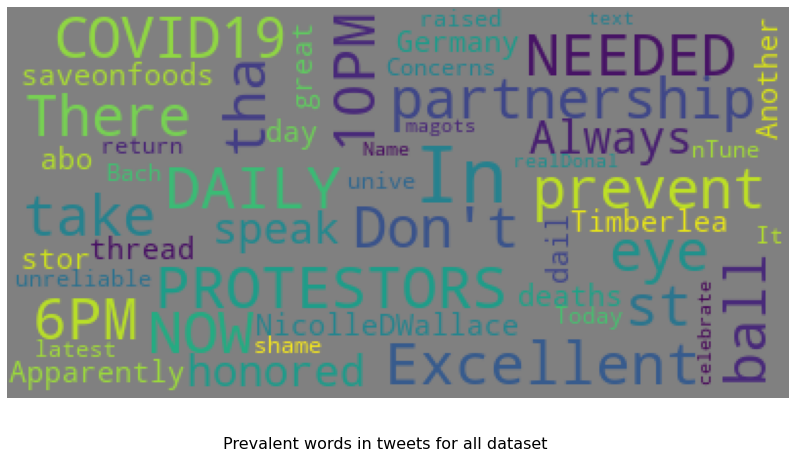

In [32]:
build_wordcloud(df['text'], 'Prevalent words in tweets for all dataset')

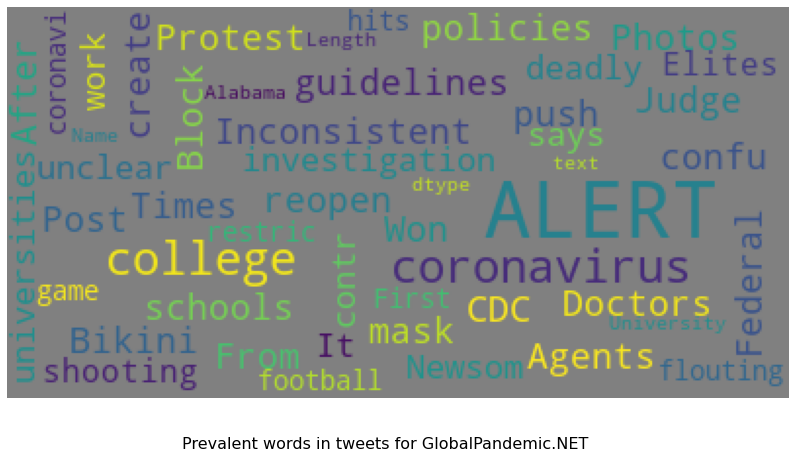

In [33]:
test_df = df[df['user_name']=='GlobalPandemic.NET']
build_wordcloud(test_df['text'], 'Prevalent words in tweets for GlobalPandemic.NET')

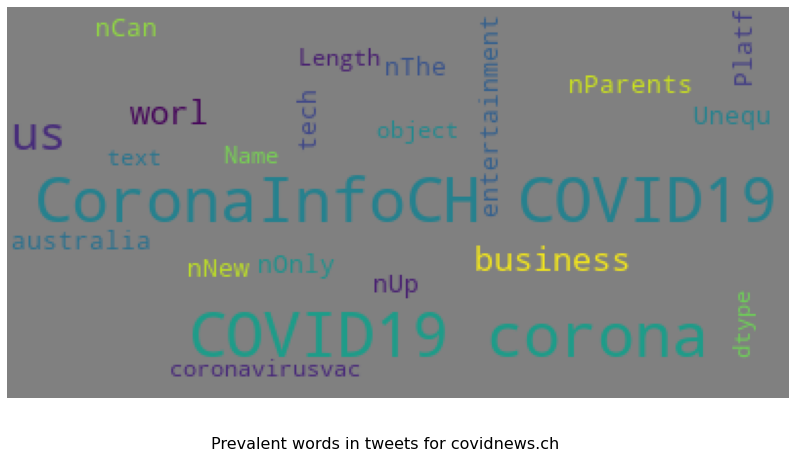

In [34]:
test_df = df[df['user_name']=='covidnews.ch']
build_wordcloud(test_df['text'], 'Prevalent words in tweets for covidnews.ch')

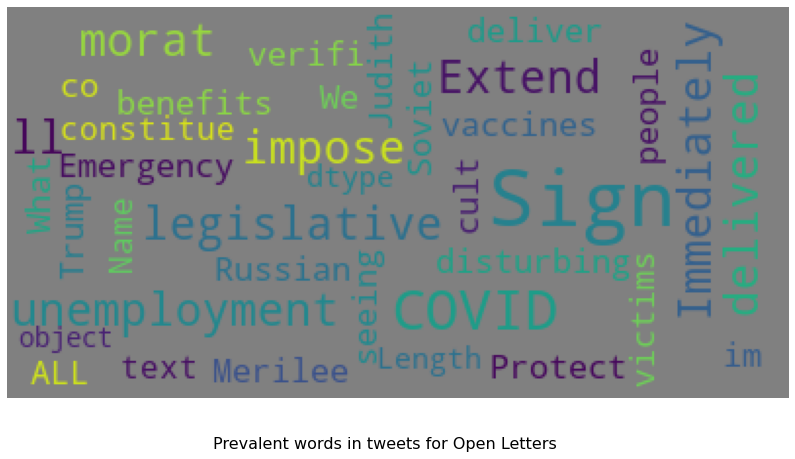

In [35]:
test_df = df[df['user_name']=='Open Letters']
build_wordcloud(test_df['text'], 'Prevalent words in tweets for Open Letters')

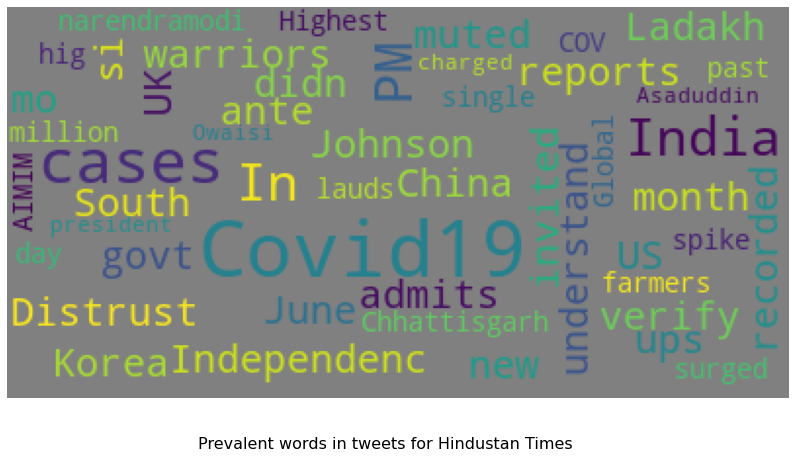

In [36]:
test_df = df[df['user_name']=='Hindustan Times']
build_wordcloud(test_df['text'], 'Prevalent words in tweets for Hindustan Times')

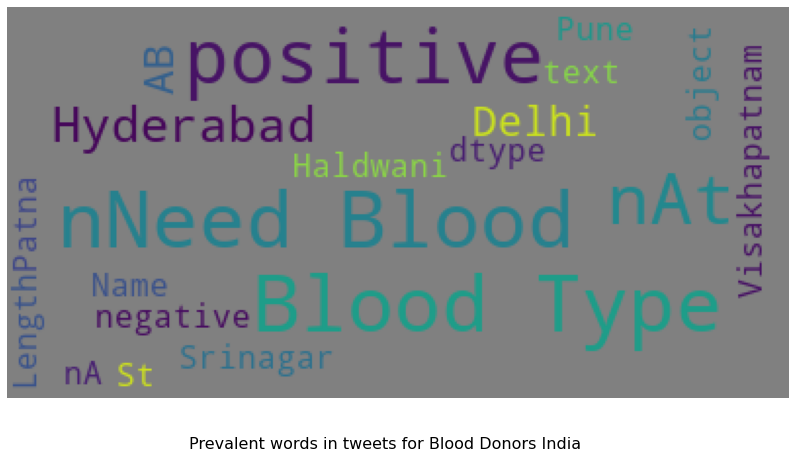

In [37]:
test_df = df[df['user_name']=='Blood Donors India']
build_wordcloud(test_df['text'], 'Prevalent words in tweets for Blood Donors India')

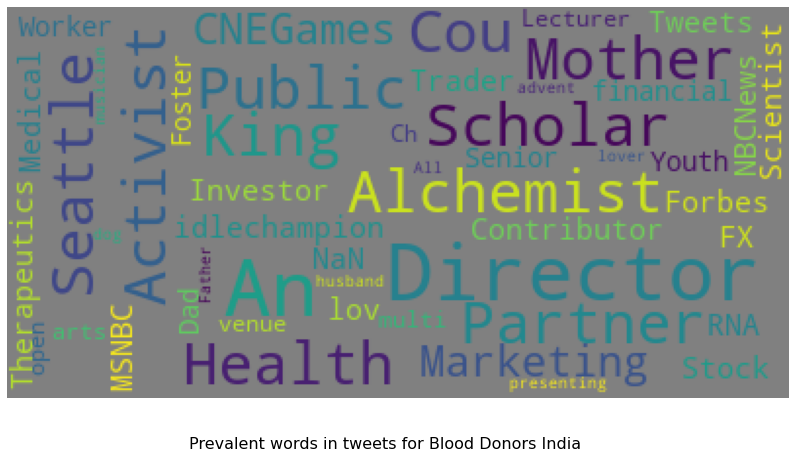

In [38]:
build_wordcloud(df['user_description'], 'Prevalent words in tweets for Blood Donors India')

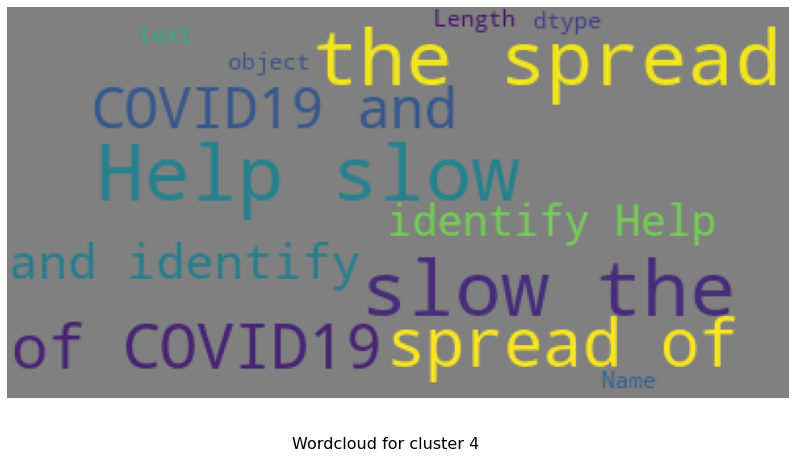

In [54]:
build_wordcloud(df[df['Cluster5'] == 4]['text'], 'Wordcloud for cluster 4')

In [55]:
df['location'] = df['user_location'].str.split(',', expand=True)[1].str.lstrip().str.rstrip()
res = df.groupby(['day', 'location'])['text'].count().reset_index()

In [56]:
country_dict = {}
for c in countries:
    country_dict[c.name] = c.alpha3
    
res['alpha3'] = res['location']
res = res.replace({"alpha3": country_dict})

country_list = ['England', 'United States', 'United Kingdom', 'London', 'UK']

res = res[
    (res['alpha3'] == 'USA') | 
    (res['location'].isin(country_list)) | 
    (res['location'] != res['alpha3'])
]

gbr = ['England', 'UK', 'London', 'United Kingdom']
us = ['United States', 'NY', 'CA', 'GA']

res = res[res['location'].notnull()]
res.loc[res['location'].isin(gbr), 'alpha3'] = 'GBR'
res.loc[res['location'].isin(us), 'alpha3'] = 'USA'
res.loc[res['alpha3'] == 'USA', 'location'] = 'USA'
res.loc[res['alpha3'] == 'GBR', 'location'] = 'United Kingdom'
plot = res.groupby(['day', 'location', 'alpha3'])['text'].sum().reset_index()
plot

,day,location,alpha3,text
0,2020-07-24,Australia,AUS,3
1,2020-07-24,Canada,CAN,5
2,2020-07-24,Colombia,COL,1
3,2020-07-24,India,IND,1
4,2020-07-24,Ireland,IRL,1
...,...,...,...,...
1439,2020-08-30,Uganda,UGA,9
1440,2020-08-30,United Arab Emirates,ARE,15
1441,2020-08-30,United Kingdom,GBR,205
1442,2020-08-30,Zambia,ZMB,1


In [57]:
fig = px.choropleth(
    plot, 
    locations="alpha3",
    hover_name='location',
    color="text",
    animation_frame='day',
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Tweets from different countries for every day',
    width=800, 
    height=600
)
fig.show()